#sinusoidal을 만들어내는 것이 phasor(ex. sin, cosin function)

#e^세타i = cos(세타) + sin(세타)i: 오일러공식

#f(세타) = e^세타i = a+bi = 오일러공식의 output
#세타의 값에 따라 변함(세타, 값) = (0, 1), (파이/2, i), (파이, -1), (3파이/2, -i)
#이 때, a는 x축, b는 y축으로 한다면 (1, 0), (0, 1), (-1, 0), (0, -1)의 좌표로 나타남
#좌표값들은 벡터값이다.

#시간의 개념이 정확히 정의가 되어있지 않으면 소리의 높이를 조절할 수 없다.
#각도와 초 개념 모두 넣어줘야 진정한 소리가 나온다.
#즉, 소리라는 실체는 그 속에 꼭 시간의 개념이 들어있어야 한다. 
#그래서, sin(세타)라고만 하면 소리를 만들 수 없다. 

In [2]:
from matplotlib import pyplot as plt #다른 표현으로 바꿔쓰기(시험)
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter #그 외 표현들은 copy해서 쓰기

[phasor]

In [3]:
#praat의 puretone 만드는 과정
amp = 1 
sr = 10000 #음질의 해상도를 의미, 1초에 총 10000개를 가지고 표현
dur = 0.5
freq = 440.0 #1초동안 모양의 반복이 얼마나 이루어지는지 
#sr과 freq 단위는 hz로 같지만 개념 구분을 해야한다. 

t = 0.0001 0.0002 0.0003 ... 0.5000 
sampling rate와 duration만 있으면 만들 수 있다.

#theta = np.arange(0, 2*np.pi, 0.1) #10pi로 설정할 경우 5번의 주기가 생긴다. 
#theta

#s = np.sin(theta) #np붙이는 것 확인 
#s

#fig = plt.figure() #figure는 전체 
#ax = fig.add_subplot(111) #1행 1열로 화면분리를 하는데 그 중 1번째를 선택
#ax.plot(theta, s, '.') #theta는 0부터 2pi, s는 sin function의 output / ,이 아닌 -의 형태로 설정할 수도 있음.
#점들의 배열을 보고 sin함수임을 알 수 있다. 
#ax.set_xlabel('theta in radians') #간격이 동일 
#ax.set_ylabel('value') #y축의 경우 linear의 형태일 때 동일(cf.non-linear) 
#소리는 시간이 있어야 하는데 본 그래프이 경우 시간이 없기에 소리가 될 수 없다. 

[시간을 만드는 경우]

In [4]:
#generate time(중요)
t = np.arange(1, sr * dur+1)/sr #1/10000초부터 5000/10000초까지
#sr만큼의 time, sr로 나눠주기 전에는 단지 인덱스를 준 상황이므로 시간이 되지는 않는다. 

In [5]:
t

array([1.000e-04, 2.000e-04, 3.000e-04, ..., 4.998e-01, 4.999e-01,
       5.000e-01])

In [6]:
#generate phase(중요), 각도값을 의미, time과 연동시켜서 처리 
theta = t * 2*np.pi * freq #np.pi는 상수값, 파이를 의미  
#freq 없이 만약 t가 1이라면, 1초동안 한바퀴 도는 형태를 만들어라.
#2파이가 1초 동안 총 몇개가 있어야 되는지를 의미 
#이전의 형태와 달리 시간의 개념이 입혀졌기 때문에 임의적으로 나눠지지 않음. 

time과 phase의 벡터 size는 같다.

In [7]:
#generate signal by cosine-phasor
s = amp*np.cos(theta) #np앞에 amp를 곱하면 증폭이 구현된다. 
#증폭은 반을 잘라서 0이 기준이다. (위, 아래 합한 값이 아니다.)
#sin -> cos로 바꿔도 다르게 들리지는 않는다. 
#형태는 같으나 파이/2만 이동하면 아예 같아진다. 얼마나 이동하든 소리는 결국 같다. 
#이 때, 각도는 phase라 하고 우리가 인식하지 못한다는 걸 알 수 있다. (cf. frequency)

Text(0, 0.5, 'real')

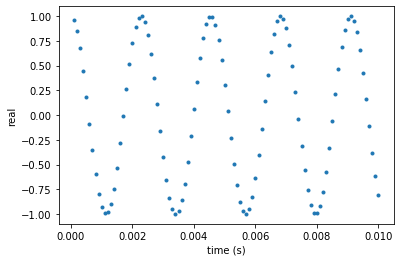

In [8]:
#그림을 그릴 준비 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:100], s[0:100], '.') #점들의 개수는 총 1000개 
ax.set_xlabel('time (s)') #2차원의 형태, 숫자가 2개있기에 2차원벡터 
ax.set_ylabel('real')

In [9]:
ipd.Audio(s, rate=sr) #import를 하지 않으면 쓸 수 없음. 
#s대신 다른 값을 쓰더라도 가능 
#시험에 구체적으로 나오지는 않음. 

In [10]:
#generate signal by complex-phasor
c = amp*np.exp(theta*1j) #1j는 i와 같음. 
c

array([0.96202767+2.72951936e-01j, 0.85099448+5.25174630e-01j,
       0.67533281+7.37513117e-01j, ..., 0.85099448-5.25174630e-01j,
       0.96202767-2.72951936e-01j, 1.        +3.13806691e-14j])

Text(0.5, 0, 'imag')

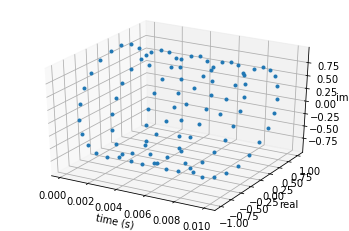

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:100], c.real[0:100], c.imag[0:100], '.') #숫자가 3개있기에 3차원벡터
ax.set_xlabel('time (s)') #총 1000개의 점이 찍힘. 
ax.set_ylabel('real')
ax.set_zlabel('imag')
#c의 값중에서 real은 앞의 값들만 imag는 뒤의 값들만 받아온다.
#ex) c = 0.99802673 + 6.27905195e-02j / c.real = 0.99802673 / c.imag = 6.27905195e-02j

In [12]:
ipd.Audio(c.real, rate=sr)

In [13]:
#!pip install sounddevice 다운받는 과정이고 이후로는 주석처리해서 재실행 x
import sounddevice as sd
sd.play(c.real, sr)

[Generate pulse train]: 

#sr=100, 100개의 숫자를 가지고 1hz frequency의 표현은 가능하다. 
#단, 10000hz는 불가능: sr은1초에 충분한 갯수를 가지고 있어야 그만한 주파수 표현이 가능
#주어진 숫자에서 표현 가능한 hz는 최대 sr의 절반수준이다. 
#ex)sr=44100일 경우 22050까지 가능하다. 

[Generate pulse train]

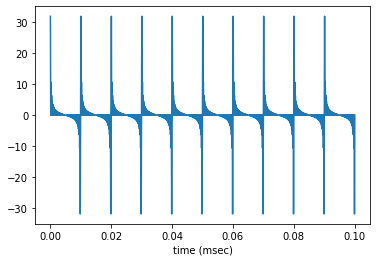

In [14]:
#generate samples, note conversion to float 32 array
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t));
for freq in range(F0, Fend+1, F0): 
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta)
    s = s + tmp
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]);
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)
#(주의)아래 그림은 waveform이고 spectrum이 아님.

#waveform: x축은 time, y축은 value 
#spectrogram: x축은 time, y축은 frequency
#spectrum(한 점에서의 시간): slice해서 어떤 frequency가 많은지? 
#ㄴ이를 시간 축으로 쭉 늘여놓은 것이 spectrogram

#formant(산맥)에 따라 달라지는데 이를 다루는 과정 

In [15]:
#1. flat하지 않고 decrease하는 과정
#2. 첫 번째 산맥을 만드는 과정
#3. 두 번째 ~ 

def hz2w(F, sr): #Frequency, Sampling Rate(입력)
    NyFreq = sr/2;
    w = F/NyFreq * np.pi;
    return w #(출력)

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate)) #내부적으로 함수가 또 들어감.
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

#내부 구조는 크게 알 필요 없음. 입력과 출력이 있다는 사실 확인. 

In [16]:
RG = 0 
BWG = 100
a, b = resonance(sr, RG, BWG) #RG = 산맥의 위치 = frequency / BWG = 산맥의 폭(shape을 결정), 값이 클수록 폭이 넓다.   
s = lfilter(b, a, s, axis = 0)
ipd.Audio(s, rate = sr)
#마이너스쪽은 생각할 필요 없음. 

In [17]:
#first formant를 만드는 과정 
RG = 500
BWG = 60
a, b = resonance(sr, RG, BWG)
s = lfilter(b, a, s, axis = 0)
ipd.Audio(s, rate = sr)

In [18]:
RG = 1500
BWG = 200
a, b = resonance(sr, RG, BWG)
s = lfilter(b, a, s, axis = 0)
ipd.Audio(s, rate = sr)

In [19]:
RG = 2500
BWG = 200
a, b = resonance(sr, RG, BWG)
s = lfilter(b, a, s, axis = 0)
ipd.Audio(s, rate = sr)

In [20]:
RG = 3500
BWG = 200
a, b = resonance(sr, RG, BWG)
s = lfilter(b, a, s, axis = 0)
ipd.Audio(s, rate = sr)
#(위로 갈수록)색이 점점 옅어진다. 

In [21]:
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate = sr)

In [22]:
#praat 기준(사람이 "이"쪽을 보고 서있음)
#이      우
#   a(500, 1500)
#   아 

In [23]:
#선형대수       
#ex)          -1 0 2
#5 3 0 1       0 1 3
#             3 -5 7
#              2 3 4
#            [인공지능: 입력 벡처를 출력 벡터로 바꿔주는 함수 역할]
#1) 5 3 0 1 * -1 0 3 2 = -3 
#2) 5 3 0 1 * 0 1 -5 3 = 6
#3) 5 3 0 1 * 2 3 7 4  = 23 

load wav

In [24]:
from scipy.io import wavfile
# sr, s = wavfile.read('a.wav')
nSamp = len(s) #sample의 갯수가 얼마나 되는지? 
dur = nSamp / sr
t = np.linspace(1/sr, dur, nSamp)

Fourier tranform

In [25]:
nFFT = nSamp #sample의 갯수에 관한 변수 이름을 바꿈 
amp = [];
for n in range(0,nFFT): #sample의 갯수만큼 루프를 돈다. 
    omega = 2*np.pi*n/nFFT # angular velocity
    z = np.exp(omega*1j)**(np.arange(0,nSamp)) 
#e^wi([0~100]) -> 예를 들어, 100개 
#w=2pi * 0 / 100 -> #0부터 루프 돌린다.
#결과적으로, [2pi * 1[0~1]] -> [0~2pi]i -> [0-2pi] = theta 
#2번째 루프에서는 [0-4pi] -> 두 바퀴를 돈다. 
#단지 똑같은 샘플의 갯수를 가지고 더 도는 것. 
#nSamp바퀴까지 간다. 여기서는 100개로 예를 들었기에 100바퀴. 
#이렇게 나온 각각을 original signal에 inner product를 시킨다. 

    amp.append(np.abs(np.dot(s,z)))
#만약, amp에 허수는 절대로 들어갈 수 없다. why? abs! 

Text(0, 0.5, 'amplitude')

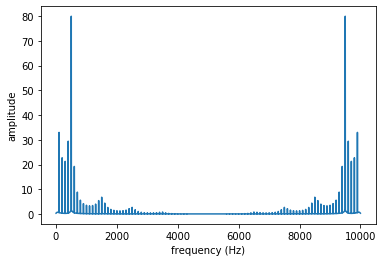

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
freq = np.arange(1,nFFT+1)*sr/nFFT; 
#+1를 해야 끝까지 포함
#[1,100] * sampling rates / 100 = [100, 10000]
#갯수는 항상 유지

ax.plot(freq, amp)
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('amplitude')
#좌우대칭(이어서 절반만 의미가 있음), 절반은 spectrum
#inner product의 absolute값
#고정타임에서 성분이 얼만큼 있는지? 시간개념은 아직 없다. 

In [ ]:
#위의 그림은 spectrum 
#spectrum이 시간 축을 기준으로 3차원으로 나온다면 spectrogram
#저주파가 강하고 고주파 부분이 약함 

In [27]:
def frame_signal(signal, srate, win_size, win_step):
    frame_size = int(win_size * srate)
    frame_step = int(win_step * srate)

    # Get number of frames
    num_frames = int(np.ceil(np.abs(len(signal) - frame_size) / frame_step))
    # Pad signal
    pad_len = num_frames * frame_step + frame_size
    pad = np.zeros((pad_len - len(signal)))
    signal_padded = np.append(signal, pad)
    # Get within-frame sample indices
    idx1 = np.tile(np.arange(0, frame_size), (num_frames, 1))
    # Get vectors of frame_step increments
    idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                   (frame_size, 1)).T
    # Get total indices divided by each frame
    indices = idx1 + idx2
    # Get frames divided by each frame based on indices
    frames = signal_padded[indices.astype(np.int32, copy=False)]
#     if cutoff is not None:
#         cutoff_bin = round(cutoff * nfft / (srate))  # hz -> bin
#         frames = frames[:, :cutoff_bin]
    return frames

def get_window(win_size, srate, win_type, win_samp=None):
    '''Get window samples for win_size'''
    if win_samp is None:
        win_samp = int(win_size * srate)  # sec -> sample

    if win_type == 'rect':
        return np.kaiser(win_samp, 0)
    elif win_type == 'hamming':
        return np.hamming(win_samp)
    elif win_type == 'hanning':
        return np.hanning(win_samp)
    elif win_type == 'kaiser':
        return np.kaiser(win_samp, 14)
    elif win_type == 'blackman':
        return np.blackman(win_samp)

def plot_spectrogram(S):
    fig, ax = plt.subplots(facecolor='white', figsize=(14, 6))
    im = ax.imshow(S.T, aspect='auto', origin='lower', cmap=plt.get_cmap('Greys'))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax)
    return fig, ax

def preemphasis(s, pre_emp=0.97):
    # Emphasize high frequency range of the waveform by increasing power(squared amplitude).
    s = lfilter([1, -pre_emp], [1], s)
    return s

In [28]:
max_freq = None  # cutoff freq
win_size = 0.008 # sec -> 이만큼씩 움직여 분석을 하겠다. 
win_step = 0.001  # sec
win_type = 'hanning' # options: 'rect', 'hamming', 'hanning', 'kaiser', 'blackman'
nfft = 1024

# Emphasize signal
s = preemphasis(s)
# Frame signal
frames = frame_signal(s, sr, win_size, win_step)
# Apply window function
frames *= get_window(win_size, sr, win_type)
print('frames:', frames.shape)

frames: (492, 80)


(<Figure size 1008x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c19f88e10>)

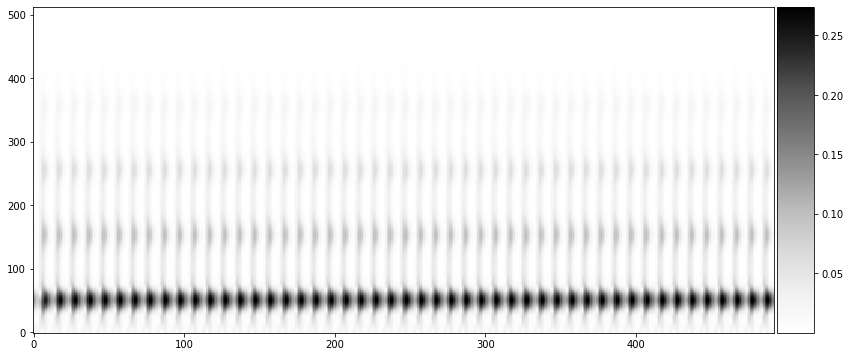

In [29]:
magspec = np.abs(np.fft.rfft(frames, n=nfft)) # frames x (nfft//2 + 1)
plot_spectrogram(magspec) 
#진한 부분은 1보다 큼, 연한 부분은 0.1보다 작은 값 

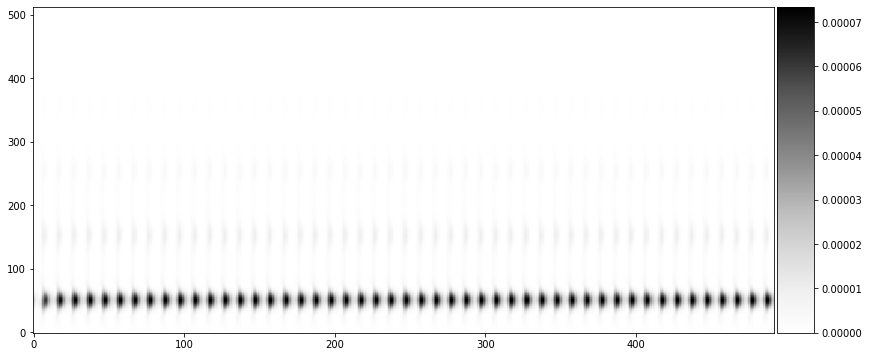

In [30]:
powspec = 1/nfft * (magspec**2)
plot_spectrogram(powspec); 
#이를 제곱하면 진한 부분은 더 커지고 연한 부분은 더 작아진다. 
#power spectrum 

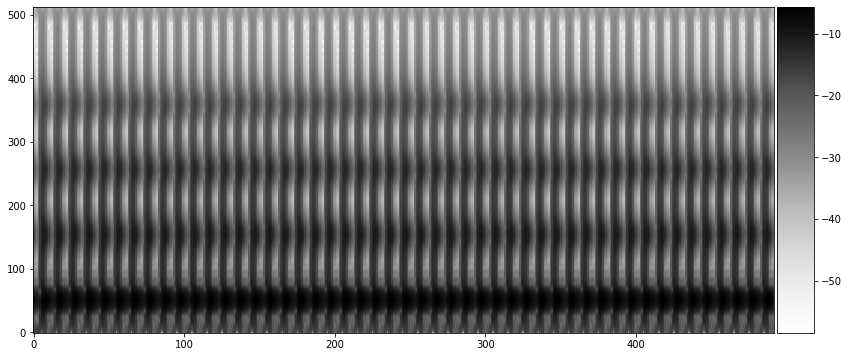

In [31]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);
#로그처리: 적당한 숫자로 만들어주는 과정